In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# get data from ... http://icarus.cs.weber.edu/~hvalle/cs4580/data/plottingDemo01.zip
homes_df = pd.read_csv('../data/homes.csv')
homes_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


## Scatter Plots
Useful for visualizing relationships between data points. :)


<Axes: >

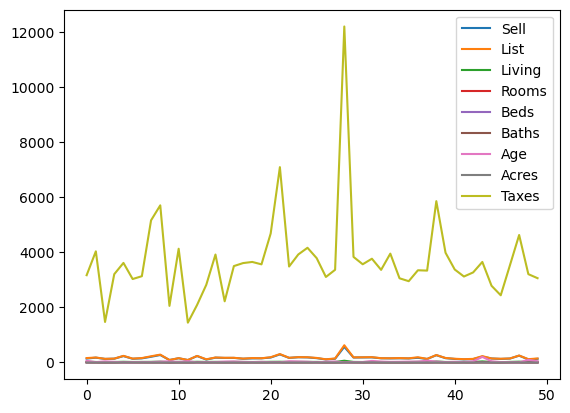

In [6]:
# specify the x and y axis labels
homes_df.plot(x='List', y='Rooms')

<Axes: xlabel='List'>

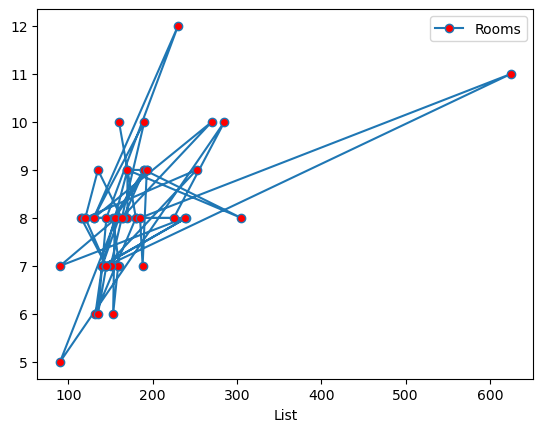

In [7]:
# add markers
homes_df.plot(x='List', y='Rooms', marker='o', markerfacecolor='r')

## Bar plot

Useful when you are showing or comparing segments of information or categorical data

In [10]:
# load data
cities_df = pd.read_csv('../data/cities.csv')
cities_df.head()

,City,Year,Population
0,Charlotte,2015,825668
1,Charlotte,2016,843117
2,Charlotte,2017,860002
3,Charlotte,2018,872514
4,Charlotte,2019,885708


In [11]:
# Filter records on: year = 2019
cities_2019_df = cities_df[cities_df['Year'] == 2019]
cities_2019_df

,City,Year,Population
4,Charlotte,2019,885708
9,San Francisco,2019,881549
14,Indianapolis,2019,876384
19,Seattle,2019,753675
24,Denver,2019,727211
29,Washington DC,2019,705749
34,Boston,2019,692600


<Axes: title={'center': 'Population of Cities in 2019'}, xlabel='City'>

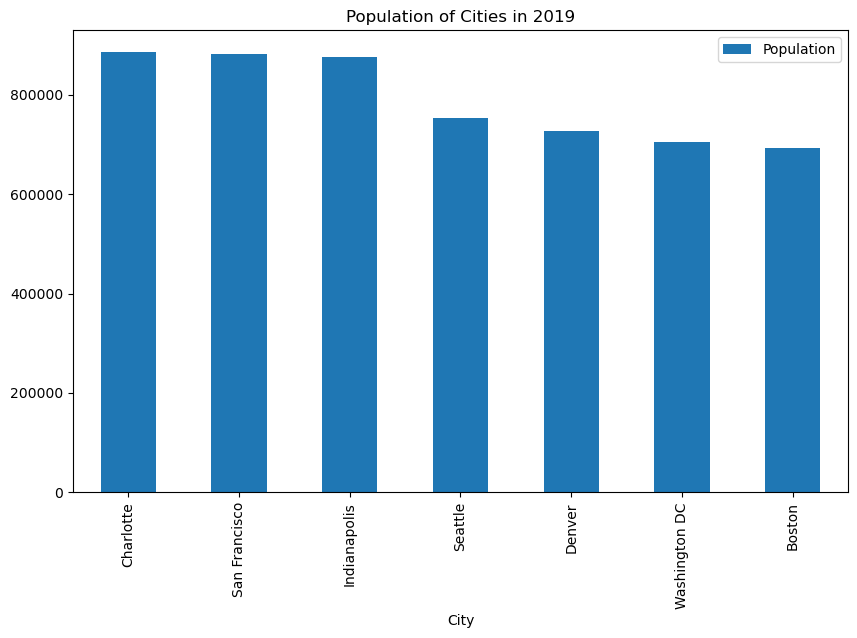

In [14]:
# Now plot a bar chart of the number of cities in each region
cities_2019_df.plot(kind='bar', x='City', y='Population', title='Population of Cities in 2019', figsize=(10,6))

<Axes: title={'center': 'Population of Cities in 2019'}, ylabel='City'>

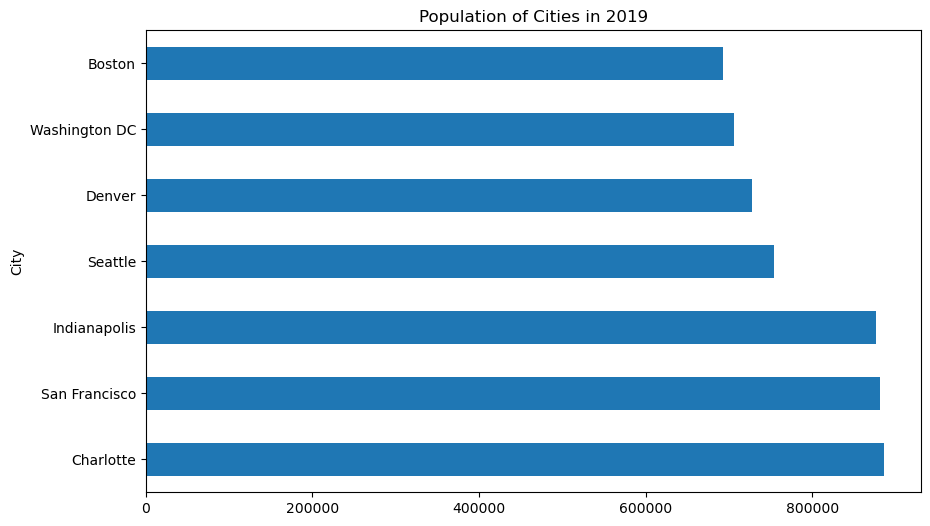

In [15]:
# you may want to plot data horizontally
# since we are only plotting one set of values we do not
cities_2019_df.plot(kind='barh', x='City', y='Population', title='Population of Cities in 2019', legend=False, figsize=(10,6))

### Scatter Plots
When you are interested in  the relationship between two variables

In [17]:
# Load data
houses_df = pd.read_csv('../data/homes.csv')
houses_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


<Axes: xlabel='Age', ylabel='List'>

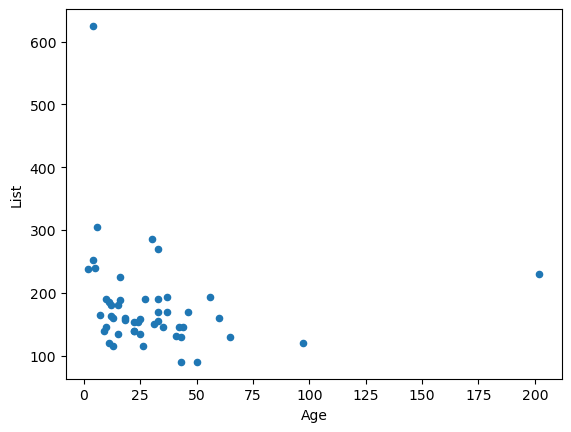

In [19]:
houses_df.plot(kind='scatter', x='Age', y='List')

<Axes: xlabel='Age', ylabel='List'>

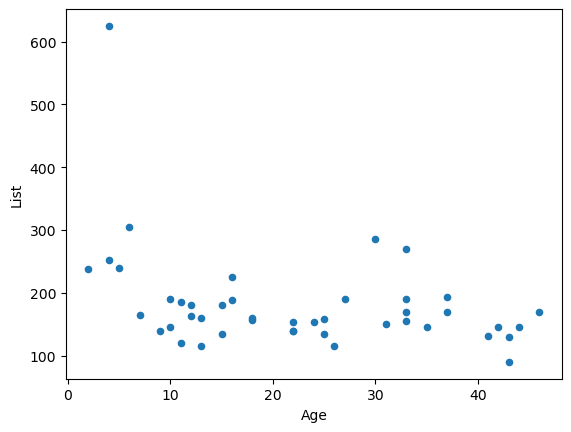

In [18]:
# filter data directly
houses_df[houses_df['Age'] < 50].plot(kind='scatter', x='Age', y='List')

<Axes: xlabel='Age', ylabel='List'>

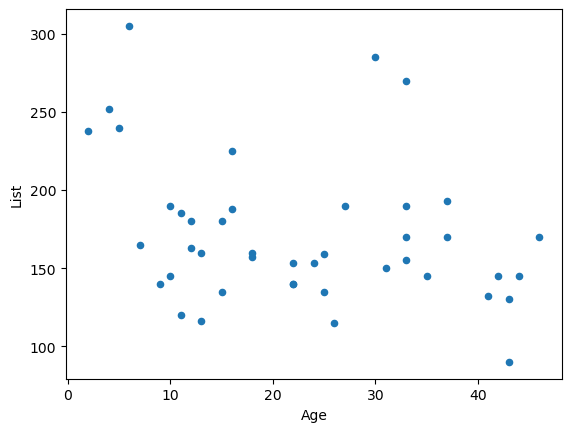

In [21]:
# If you want to eliminate outliers, you can filter the date before plotting
house_plot_df = houses_df[houses_df['Age'] < 50]
house_plot_df = house_plot_df[house_plot_df['List'] <350]
# Now plot!
house_plot_df.plot(kind='scatter', x='Age', y='List')

### Histograms

Great for representing frequency in dataset

In [22]:
house_plot_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613
5,135,140,18,7,4,3,9,0.57,3028


<Axes: title={'center': 'Acre Distribution for Homes < 50 and List < 350'}, ylabel='Frequency'>

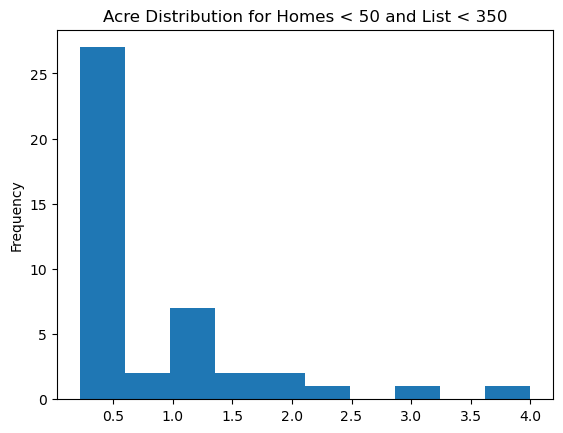

In [23]:
# If you want to know the distribution of acreage for the houses
# sold in the filtered dataset, use a histogram

house_plot_df['Acres'].plot(kind='hist',title='Acre Distribution for Homes < 50 and List < 350')

### Area Plot
Useful when you want to understand how values develop and are composed over time

In [24]:
## Load data set
enrollments_df = pd.read_csv('../data/enrollment.csv')
enrollments_df.head()

,Year,Class,Enrollment
0,2018,Freshman,1500
1,2018,Sophomore,1400
2,2018,Junior,1300
3,2018,Senior,1200
4,2019,Freshman,1600


<Axes: xlabel='Year'>

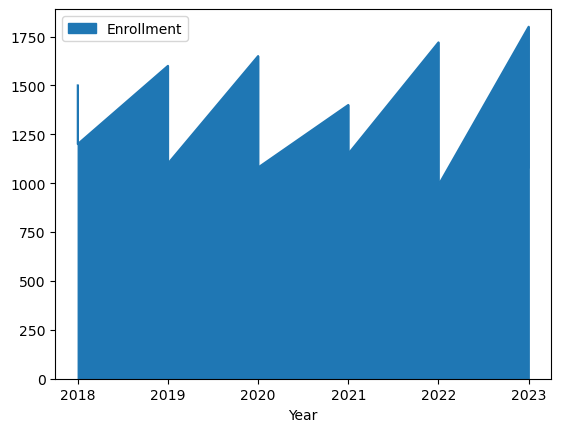

In [26]:
enrollments_df.plot(kind='area',x='Year')

In [27]:

# Data is not good because it is not organized by year
# We want to see the total, and how it changes over time
# Sort the data by year, then plot it using the pivot method in pandas
pivot_df = enrollments_df.pivot(index='Year', columns='Class', values='Enrollment')
pivot_df.head()

Class,Freshman,Junior,Senior,Sophomore
Year,,,,
2018,1500,1300,1200,1400
2019,1600,1200,1100,1500
2020,1650,1100,1080,1320
2021,1400,1100,1150,1390
2022,1720,1080,990,1300


<Axes: xlabel='Year'>

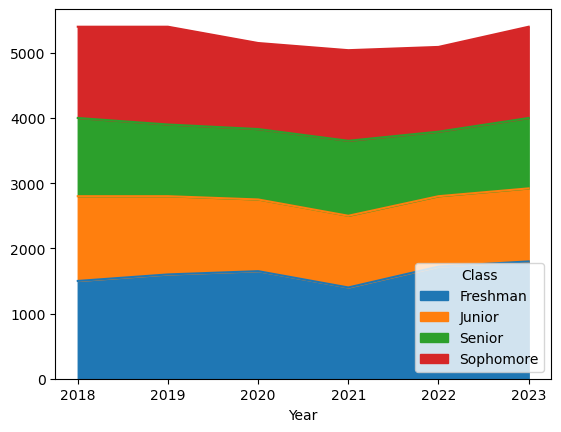

In [29]:
# plot it
pivot_df.plot(kind='area')

<Axes: xlabel='Year'>

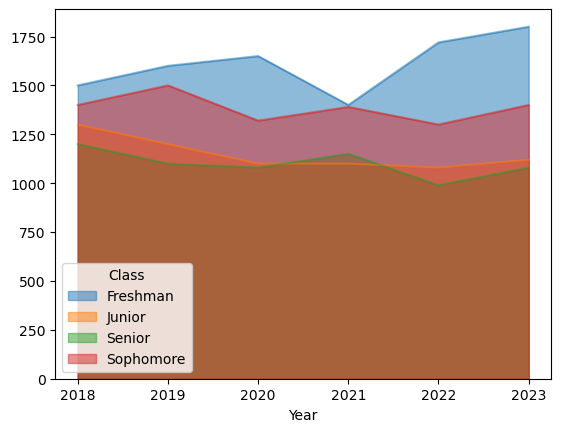

In [30]:
# The data is stacked by default.
# You can set this option to false: stacked=False
pivot_df.plot(kind='area', stacked=False)

## Correlation Analysis
- What is correlation analysis?
- How does correlation analysis help with data cleaning?
- Coding example

### Correlation Analysis
A statistical technique used to examin the strength and direction of the relationship
 between two or more variables.

 Analyze the degree to which changes from one variable are associated with changes from another variable?

### How to do it?
Use `Correlation Coefficients`, which is a measurement of the strength and the direction of the relationship between the two variables

$$
\{Y, X\}
$$

### Popular Correlation Coefficients

#### Pearson Correlation
- Use for contineous data
- Measures the strength of the `linear relationship` between the varisbles
- Sensitive to outliers

#### Spearman

- Use for ordinal or ranked data
- Measures the strength of the `monotonic relationship` between the variables, which can be linear or non-linear
- More robust toward outliers

Correlation analysis can identify variables that are highly correlated to each other.

The analysis may indicate if one variable is `redundant` and can be eliminated

### Dealing with Categorical Data
- Data has many `non-numeric` features. You CANNOT feed them to a learning model. They need to be converted.
- use the `pd.dtypes()` to see the data types

#### Two main types
- Label encoding
- One-hot encoding

### Label Encoding
Each `unique` category in the categorical variable is assigned a numerical label. Typically starting at 0, 1, etc

### One-Hot Encoding
A new binary feature is created for each categiry, and the value of that feature is set to 1 if the observation belongs to that
...
